**Prepare Data for Modeling
Before building a machine learning model, we need to preprocess and structure the data.**

In [16]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning & Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# System & File Handling
import os

# Suppress Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

print("Libraries imported successfully!")

Libraries imported successfully!


In [18]:
# Load cleaned datasets
users_df = pd.read_csv("../data/cleaned_users.csv")
hotels_df = pd.read_csv("../data/cleaned_hotels.csv")

# Convert date column to datetime format
hotels_df["date"] = pd.to_datetime(hotels_df["date"], format="%Y-%m-%d")

print("Dataset loaded successfully!")
print(hotels_df.head())

Dataset loaded successfully!
   travelCode  userCode     name               place  days   price    total  \
0           0         0  Hotel A  florianopolis (sc)     4  313.02  1252.08   
1           2         0  Hotel K       salvador (bh)     2  263.41   526.82   
2           7         0  Hotel K       salvador (bh)     3  263.41   790.23   
3          11         0  Hotel K       salvador (bh)     4  263.41  1053.64   
4          13         0  Hotel A  florianopolis (sc)     1  313.02   313.02   

        date  
0 2019-09-26  
1 2019-10-10  
2 2019-11-14  
3 2019-12-12  
4 2019-12-26  


In [19]:
# Selecting relevant features
features = hotels_df[["days", "userCode", "travelCode"]]  # More features can be added
target = hotels_df["price"]

# Splitting data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("Feature selection completed!")
print(X_train.shape, X_test.shape)

Feature selection completed!
(32441, 3) (8111, 3)


In [20]:
# Initialize Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = linear_model.predict(X_test)

# Evaluate model performance
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Performance: MAE = {mae_lr:.2f}, R² = {r2_lr:.2f}")

Linear Regression Performance: MAE = 64.49, R² = 0.01


In [21]:
# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Performance: MAE = {mae_rf:.2f}, R² = {r2_rf:.2f}")

Random Forest Performance: MAE = 71.44, R² = -0.29


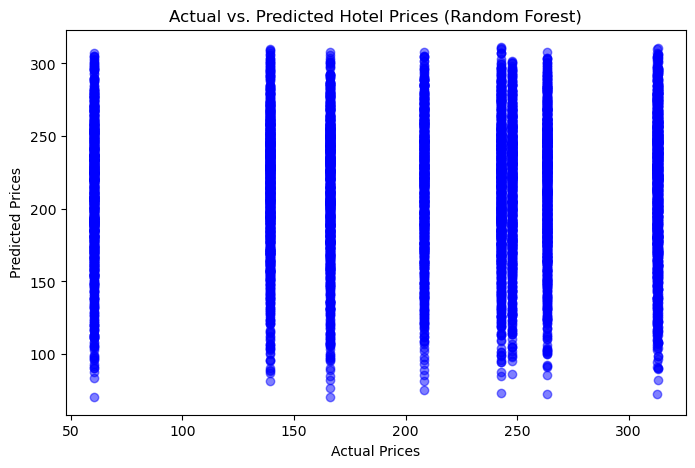

In [22]:
# Scatter plot: Actual vs. Predicted Prices (Random Forest)
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf, color="blue", alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Hotel Prices (Random Forest)")
plt.savefig("../reports/figures/predicted_prices_rf.png")  # Save figure
plt.show()

In [23]:
# Save Model Performance Reports
results_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mae_lr, mae_rf],
    "R² Score": [r2_lr, r2_rf]
})
results_df.to_csv("../reports/model_performance.csv", index=False)

print("Model reports saved successfully!")

Model reports saved successfully!
